In [16]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz


In [17]:
creditos = pd.read_csv('Credit.csv')
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [18]:
previsores = creditos.iloc[:,0:20].values
classe = creditos.iloc[:,20].values


In [27]:

for i in range (0,20):
    lenconder = LabelEncoder() 
    if type(previsores[0,i]) == str:
        previsores[:,i] = lenconder.fit_transform(previsores[:,i])



In [28]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores,classe,
                                        test_size=0.3, random_state=0)


In [29]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treino,y_treino)

DecisionTreeClassifier()

In [30]:
#exportaçao da arvore de decisao para arquivo .dot (visualizaçao) 
export_graphviz(arvore, out_file='arvore.dot')


In [31]:
previsoes = arvore.predict(x_teste)
previsoes

array(['bad', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
      

In [32]:
confusao = confusion_matrix(y_teste,previsoes)
confusao

array([[ 45,  41],
       [ 51, 163]])

In [33]:
accuracy = accuracy_score(y_teste,previsoes)
accuracy

0.6933333333333334

In [34]:
taxa_erro = 1 - accuracy
taxa_erro

0.30666666666666664

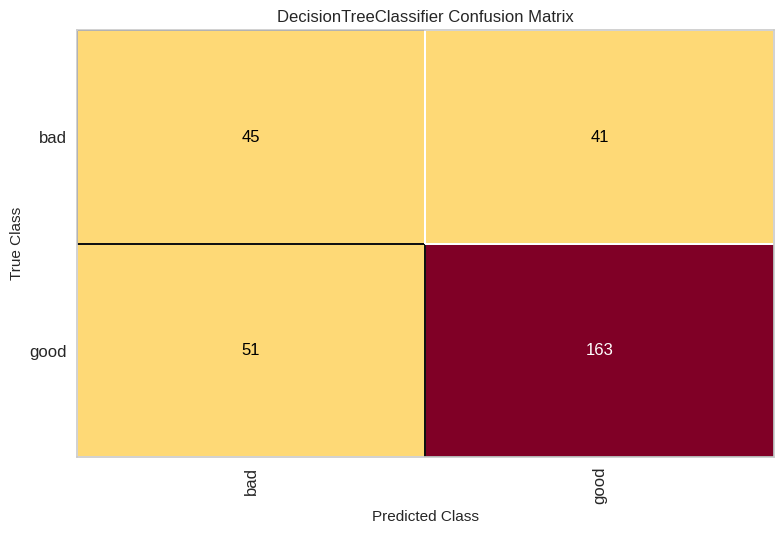

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
vis = ConfusionMatrix(arvore)
vis.fit(x_treino, y_treino)
vis.score(x_teste, y_teste)
vis.show()